In [97]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import numpy as np

In [47]:
categories = ['sci.med','sci.space']

In [48]:
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

In [49]:
data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

In [65]:
len(data_train["data"])

1187

In [61]:
data_train["target"]

array([1, 0, 0, ..., 1, 1, 0])

In [115]:
cv = CountVectorizer(stop_words = "english")

In [131]:
X = cv.fit_transform(data_train["data"])
y = data_train["target"]

In [73]:
X.shape
y.shape

(1187,)

In [74]:
X.shape

(1187, 21368)

In [75]:
#l1 penalty allows for zero coefficients (automatic feature selection)
lr = LogisticRegression(solver="liblinear", penalty="l1")
lr.fit(X,y)
pd.DataFrame(lr.coef_, columns=cv.get_feature_names())

,00,000,0000,00000,000000,000062david42,00014,00041032,0004136,0004246,...,zullen,zulu,zurbrin,zwaartepunten,zwak,zwakke,zware,zwarte,zz,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
#l2 penalty can have coefficients close to, but not exactly zero
lr2 = LogisticRegression(penalty="l2")
lr2.fit(X,y)
pd.DataFrame(lr2.coef_, columns=cv.get_feature_names())

,00,000,0000,00000,000000,000062david42,00014,00041032,0004136,0004246,...,zullen,zulu,zurbrin,zwaartepunten,zwak,zwakke,zware,zwarte,zz,zzz
0,0.068245,0.040755,-0.000933,0.002614,-2.119439e-07,-9.676186e-08,-0.04226,0.001307,0.000663,0.000644,...,0.000548,-7.169419e-09,0.000018,0.000274,0.000274,0.000274,0.000274,0.000548,-0.144177,-0.174957


In [132]:
lr = LogisticRegressionCV(solver ="liblinear", penalty="l1")


In [133]:
lr.fit(X,y)
lr.score(X, y)

0.98652064026958719

In [119]:
tfidf = TfidfVectorizer(stop_words="english")

In [175]:
Xtf = tfidf.fit_transform(data_train["data"])
ytf = data_train["target"]

In [127]:
Xtf

<1187x21368 sparse matrix of type '<type 'numpy.float64'>'
	with 89001 stored elements in Compressed Sparse Row format>

In [128]:
lr2 = LogisticRegressionCV(solver ="liblinear", penalty="l1")

In [129]:
lr2.fit(Xtf, ytf)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [130]:
lr2.score(Xtf, ytf)

0.98652064026958719

In [184]:
predictions = lr2.predict_proba(Xtf)
predictions

array([[  2.77003917e-03,   9.97229961e-01],
       [  9.99998074e-01,   1.92602626e-06],
       [  9.99796892e-01,   2.03108449e-04],
       ..., 
       [  1.09059345e-05,   9.99989094e-01],
       [  1.39350806e-03,   9.98606492e-01],
       [  9.97657965e-01,   2.34203512e-03]])

In [185]:
np.sum(predictions, axis=1)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [142]:
type(predictions)
predictions.shape

(1187, 2)

In [176]:
predictions1 = predictions[:,1]
predictions1.shape

(1187,)

In [147]:
ytf.shape

(1187,)

In [177]:
ytf = pd.Series(ytf)
predictions1 = pd.Series(predictions1)

(1187,)

In [178]:
df_comparisons = pd.DataFrame()
df_comparisons["probability class 1"] = predictions1
df_comparisons["actuals"] = ytf

In [179]:
df_comparisons

,probability class 1,actuals
0,9.972300e-01,1
1,1.926026e-06,0
2,2.031084e-04,0
3,6.596667e-04,0
4,9.999995e-01,1
5,8.760917e-07,0
6,9.984202e-01,1
7,9.995530e-01,1
8,9.992318e-01,1
9,9.985743e-01,1


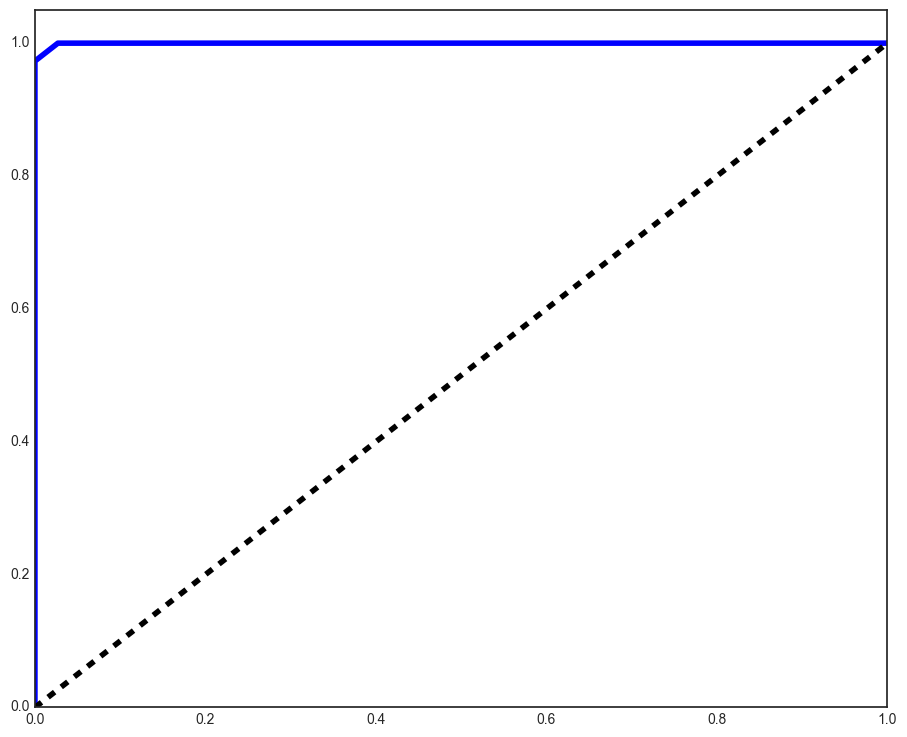

In [183]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(df_comparisons["actuals"], df_comparisons["probability class 1"])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=18)
# plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
# plt.legend(loc="lower right")
plt.show()

In [181]:
FPR

{1: array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.02693603,  0.08922559,  0.09259259,  1.        ])}

In [182]:
TPR

{1: array([ 0.00505902,  0.0084317 ,  0.60708263,  0.61045531,  0.97301855,
         1.        ,  1.        ,  1.        ,  1.        ])}